# WordGraph 

In [1]:
from wordGraph.wordGraph import WordGraph
from wordGraph.io.pubmed_io import parse_pubmed_api
from wordGraph.visualization.viz_utils import plot_top_terms, plot_graph

### 1. Set the parameters

In [2]:
pm_query = 'cancer'; n_doc = 5000        # Corpus parameters
n_clust = 3; n_terms = 10                # Co-clustering parameters
n_shuffles = 100; conf_threshold = 0.05  # MIIC parameters

### 2. Fetch data from the PubMed API

In [3]:
raw_corpus, clean_corpus = parse_pubmed_api(pm_query,n_doc)

Output(layout=Layout(display='flex', grid_gap='20px', justify_content='center', margin='0 0 20px 0'))

### 3. Fit the coclustering

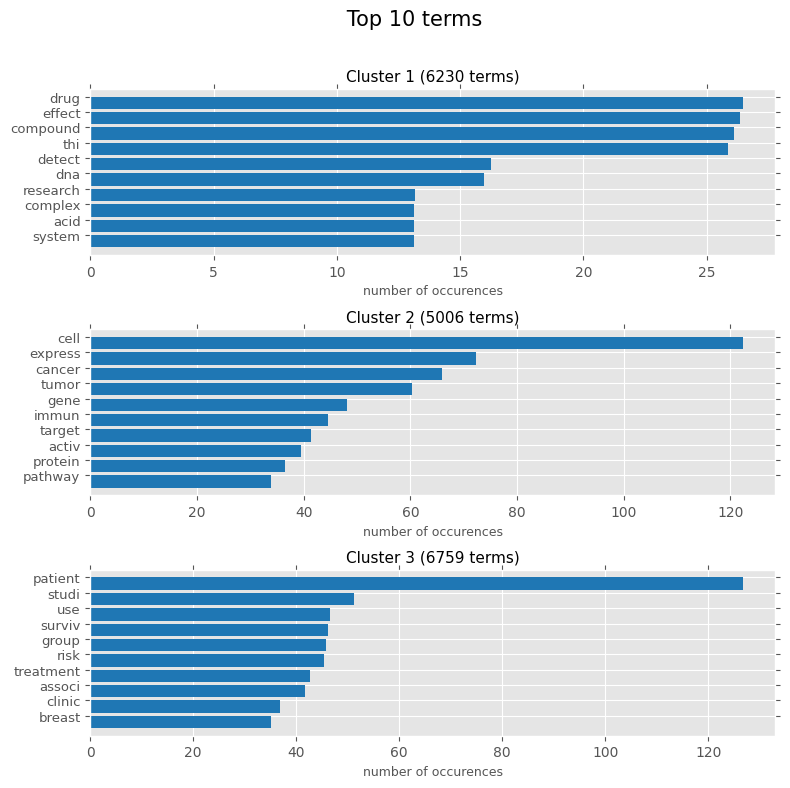

In [4]:
wg = WordGraph()
wg.fit_coclust(clean_corpus, n_clust)
plot_top_terms(wg, nb_terms=n_terms)

### 4. Build the words graph 

In [5]:
wg.set_cocluster(cocluster=3, nb_terms=n_terms)
wg.build_graph(n_shuffles=n_shuffles, conf_threshold=conf_threshold)

### 5. Plot the interactive words graph

In [6]:
plot_graph(wg)

GridBox(children=(Box(children=(VBox(children=(HTML(value='<h3>Cluster graph</h3>'),), layout=Layout(justify_c…

In [7]:
tfidf_filename = 'io/tfidf' 
miic_filename = 'io/miic.txt'

# 6. Export collected documents in tf-idf vectorized format
wg.export_tfidf(tfidf_filename)

# 7. Explore graphs report summary
wg.graph['summary']

,x,y,type,ai,info,info_cond,cplx,Nxy_ai,log_confidence,infOrt,trueOrt,isOrtOk,sign,partial_correlation,isCausal,proba
0,patient,surviv,P,NA_character_,151.723132,151.723132,17.151697,1966.0,134.571435,1,NA,NA,+,0.384508,N,NA
1,studi,use,P,NA_character_,317.257357,317.257357,253.924898,1966.0,63.332459,1,NA,NA,+,0.123063,N,NA
2,patient,treatment,P,NA_character_,81.151231,81.151231,25.786824,1966.0,55.364407,1,NA,NA,+,0.276513,N,NA
3,associ,risk,P,NA_character_,58.304126,58.304126,24.719776,1966.0,33.58435,2,NA,NA,+,0.235569,N,1;0.5
4,clinic,studi,P,NA_character_,240.548385,240.548385,211.664317,1966.0,28.884068,1,NA,NA,+,0.004798,N,NA


In [8]:
# 8. Export top terms representation in MIIC server format
wg.export_topTerms_MIIC(miic_filename)